In [ ]:
from __future__ import print_function
import numpy as np
from matplotlib import pyplot
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Cell used to import data from drive, data is in a .zip file
from zipfile import ZipFile

PATH_OF_FILE = 'gdrive/My Drive/fairface-img-margin025-trainval.zip'

print("Loading file")
with ZipFile(PATH_OF_FILE, 'r') as zipObj:
    print("Extracting")
    zipObj.extractall() 
print("Complete")

Loading file
Extracting
Complete


In [ ]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

kmeans = KMeans(n_clusters = 2, n_jobs = -1, verbose = 1)

kmeans.fit(val_set)

predictions = kmeans.predict(val_set)

print(predictions)
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

[0 1 1 ... 1 0 1]
2706226.4617345524
[[1.09063668 0.71432222 1.01565004 ... 0.7543644  0.37367632 0.43754229]
 [0.65157255 0.56056367 0.8547304  ... 0.55264879 0.28135109 0.24321629]]


# Extract face embeddings with FaceNet

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from PIL import Image
import pandas as pd

def embedding_image(filename):
    img = Image.open(filename)
    img = img.convert('RGB')
    img = img.resize((160, 160))
    img = np.asarray(img)

    img = img.astype('float32')
    mean = img.mean()
    std = img.std()
    
    img = (img - mean) / std

    img = np.expand_dims(img, axis=0)
    img_embedding = faceNet.predict(img)

    return img_embedding[0]


faceNet = load_model('gdrive/My Drive/facenet_keras.h5')

files_df = pd.read_csv('gdrive/My Drive/fairface_label_train.csv')
files_list = files_df['file'].tolist()

embeddings_images = []

nr = 0

for filename in files_list:
    emb = embedding_image(filename)
    embeddings_images.append(emb)

    nr += 1
    if((nr % 500) == 0):
        print("Extracted for", nr, "images")



In [ ]:
embeddings_df = pd.DataFrame(embeddings_images)

embeddings_df.to_csv('gdrive/My Drive/face_embbedings.csv', index = False)

# K-means

In [ ]:
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

NUMBER_CLUSTERS = 20

data_set = (pd.read_csv('gdrive/My Drive/face_embbedings.csv')).to_numpy()

distortion_list = []
sil_scores_list = []

for nr_clusters in range(1, NUMBER_CLUSTERS + 1):
    kmeans = KMeans(n_clusters = nr_clusters, max_iter = 1000, n_jobs = -1, verbose = 1)

    kmeans.fit(data_set)

    distortion_value = kmeans.inertia_
    distortion_list.append(distortion_value)

    predictions = kmeans.predict(data_set)
    
    print("For", nr_clusters)
    print("Distortion value:", distortion_value)

    if(nr_clusters > 1):
        sil_score = silhouette_score(data_set, predictions)
        sil_scores_list.append(sil_score)
        print("Silouhette score:", sil_score, "\n")


For 1
Distortion value: 10137721.486857159
For 2
Distortion value: 9708792.767022338
Silouhette score: 0.032411623003432914 

For 3
Distortion value: 9387497.272318946
Silouhette score: 0.02069209643674227 

For 4
Distortion value: 9177443.226038242
Silouhette score: 0.025198245754544348 

For 5
Distortion value: 8999161.885746535
Silouhette score: 0.029817021767364706 

For 6
Distortion value: 8858673.155041639
Silouhette score: 0.030308158452326855 

For 7
Distortion value: 8731753.139758611
Silouhette score: 0.021444188622868572 

For 8
Distortion value: 8629673.872611327
Silouhette score: 0.0245392980908798 

For 9
Distortion value: 8541842.469333488
Silouhette score: 0.025364776136901968 

For 10
Distortion value: 8466159.031048385
Silouhette score: 0.023756878267724022 

For 11
Distortion value: 8396388.786913987
Silouhette score: 0.02656122079448219 

For 12
Distortion value: 8338219.085153546
Silouhette score: 0.012016010196917108 

For 13
Distortion value: 8280767.089293038
Si

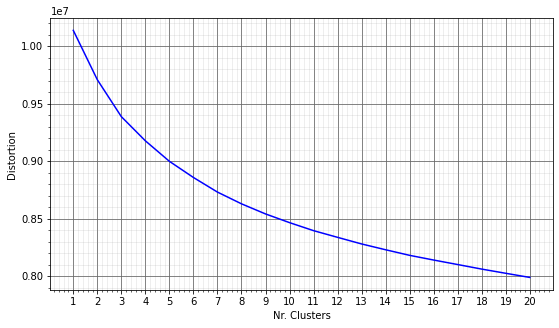

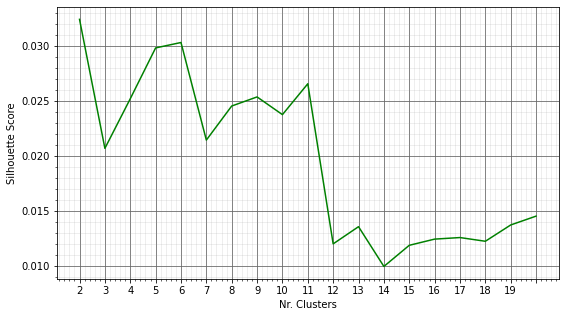

In [ ]:
def plot_values(
        values,
        color='blue', 
        label = 'Distortion', 
        parameter = "Nr. Clusters"
    ):
    
    pyplot.figure(figsize=(9, 5))
    pyplot.plot(values, color=color)
    pyplot.xlabel(parameter)
    pyplot.ylabel(label)
    pyplot.grid(b=True, which='major', color='#666666', linestyle='-')
    pyplot.minorticks_on()
    pyplot.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    if(label == 'Silhouette Score'):
        pyplot.xticks( np.arange(len(values)), range(2,len(values) + 1) )
    else:
        pyplot.xticks( np.arange(len(values)), range(1,len(values) + 1) )

plot_values(distortion_list)
plot_values(sil_scores_list, color = 'green', label = "Silhouette Score")

In [ ]:
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

NUMBER_CLUSTERS = 6

data_set = (pd.read_csv('gdrive/My Drive/face_embbedings.csv')).to_numpy()

kmeans = KMeans(n_clusters = NUMBER_CLUSTERS, max_iter = 1000, n_jobs = -1, verbose = 1)

kmeans.fit(data_set)

predictions = kmeans.predict(data_set)
data = []

for i in range(0, len(predictions)):
    data.append(["train/" + str(i + 1) + ".jpg", predictions[i]])

data_df = pd.DataFrame(data)

In [ ]:
data_df.to_csv('gdrive/My Drive/6_clusters_face.csv', index = False)

In [ ]:
centroids_list = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids_list)
centroids_df.to_csv('gdrive/My Drive/6_clusters_centers.csv', index = False)

**Cell for the closest images to the culster's centroid**

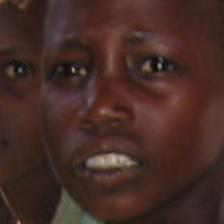

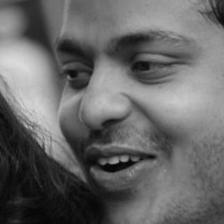

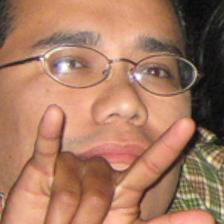

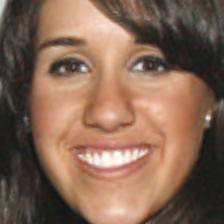

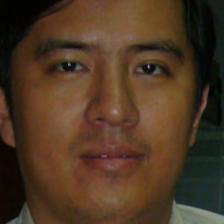

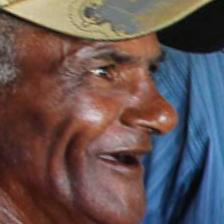

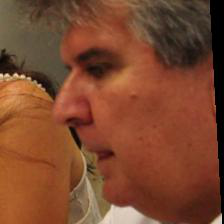

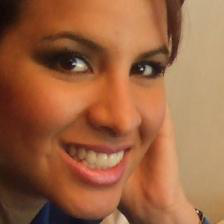

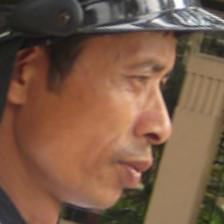

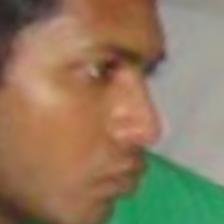

In [ ]:
from PIL import Image
from IPython.display import display
import pandas as pd
import scipy
from scipy.spatial.distance import cdist

data_df = (pd.read_csv('gdrive/My Drive/face_embbedings.csv')).to_numpy()
centroids_df = pd.read_csv('gdrive/My Drive/6_clusters_centers.csv')


def compute_distances(centroids, data_set, cluster):
    return cdist(centroids[cluster:cluster + 1], data_set,'euclidean')

def show_closest_images(cluster, centroids_df, data_df, nr_images):
    centroids = centroids_df.values

    distances = (compute_distances(centroids, data_df, cluster))[0]

    list_dist = [(distances[i], i) for i in range(0, len(distances))]
    list_dist.sort(key = lambda x: x[0])  
    
    for i in range(0, nr_images):
        filename = 'train/' + str(list_dist[i][1]) + '.jpg'
        display(Image.open('/content/' + filename).convert('RGB'))
    

show_closest_images(1, centroids_df, data_df, nr_images = 10)

In [ ]:
from PIL import Image
from IPython.display import display
import pandas as pd

data_df = pd.read_csv('gdrive/My Drive/6_clusters_face.csv')

def show_clusters(cluster, data_df):
    cluster_df = (data_df.loc[data_df['1'] == cluster]).values
    for i in range(0, 50):
        display(Image.open('/content/' + cluster_df[i][0]).convert('RGB'))

show_clusters(0, data_df)

# DBSCAN

In [ ]:
import pandas as pd

data_df = (pd.read_csv('gdrive/My Drive/face_embbedings.csv'))
8.24
#data_df = data_df.sample(frac=0.5, random_state=0)

data_set = data_df.to_numpy()

In [ ]:
mean = np.mean(data_set, axis=0)
std = np.std(data_set, axis=0)

data_set = (data_set - mean)/std

print(data_set.shape)

(86744, 128)


In [ ]:
import numpy as np 
import pandas as pd
from numba import jit, cuda
import sklearn
  
from sklearn.cluster import DBSCAN 

EPSILON = 10.5
M = 5

dbscan = DBSCAN(eps = EPSILON, min_samples = M, n_jobs = -1)

@jit
def fit_on():
    dbscan.fit(data_set)

fit_on()

<ipython-input-17-d1e8e001c7ab>:13: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fit_on" failed type inference due to: Untyped global name 'dbscan': cannot determine Numba type of <class 'sklearn.cluster._dbscan.DBSCAN'>

File "<ipython-input-17-d1e8e001c7ab>", line 15:
def fit_on():
    dbscan.fit(data_set)
    ^

  @jit
/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "fit_on" was compiled in object mode without forceobj=True.

File "<ipython-input-17-d1e8e001c7ab>", line 14:
@jit
def fit_on():
^

  state.func_ir.loc))
/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-

In [ ]:
from collections import Counter

print(Counter(dbscan.labels_).keys())
print(Counter(dbscan.labels_).values())

dict_keys([0, -1, 19, 1, 2, 8, 10, 31, 3, 4, 5, 15, 6, 38, 35, 16, 7, 9, 48, 11, 12, 49, 53, 26, 13, 41, 25, 14, 17, 22, 52, 18, 23, 20, 21, 24, 40, 27, 28, 29, 30, 47, 32, 33, 51, 34, 37, 50, 42, 36, 39, 45, 46, 44, 43])
dict_values([74905, 11493, 22, 9, 10, 6, 4, 7, 9, 5, 13, 9, 5, 6, 4, 6, 8, 6, 6, 6, 8, 4, 5, 5, 7, 5, 5, 5, 6, 15, 4, 5, 4, 9, 5, 14, 4, 4, 5, 8, 6, 7, 1, 5, 4, 10, 6, 4, 3, 9, 4, 4, 4, 5, 6])


M = 10
Eps = 12.
dict_keys([0, -1])
dict_values([86438, 306])

M = 10
Eps = 11.5
dict_keys([0, -1])
dict_values([84960, 1784])

M = 10
Eps = 11.
dict_keys([0, -1, 1])
dict_values([80673, 6058, 13])

M = 5
Eps = 11.
dict_keys([0, -1, 9, 4, 1, 8, 7, 5, 2, 3, 6])
dict_values([81777, 4924, 3, 7, 5, 5, 4, 5, 5, 5, 4])

# Compute kth distances

In [ ]:
import pandas as pd
import numpy as np

data_set = (pd.read_csv('gdrive/My Drive/face_embbedings.csv')).to_numpy()



In [ ]:
from matplotlib import pyplot
from numba import jit, cuda
import scipy
from scipy.spatial.distance import cdist

distances_df = pd.DataFrame()

@jit
def compute_kth_dist(data_set, k = 0):
    return cdist(data_set[k:k + 5000], data_set,'euclidean')

@jit
def compute_last_dist(data_set, k = 0):
    return cdist(data_set[k:len(data_set)], data_set,'euclidean')

for K in range(0, 40000, 5000):
    print("Executed for", K, "points")
    distances_list=compute_kth_dist(data_set, k = K)
    distances_df = pd.concat([distances_df, pd.DataFrame((np.sort(distances_list))[:,0:500])])

distances_list=compute_last_dist(data_set, k = 40000)
distances_df = pd.concat([distances_df, pd.DataFrame((np.sort(distances_list))[:,0:500])])

Executed for 0 points


<ipython-input-27-ee5c25998b78>:8: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "compute_kth_dist" failed type inference due to: Untyped global name 'cdist': cannot determine Numba type of <class 'function'>

File "<ipython-input-27-ee5c25998b78>", line 10:
def compute_kth_dist(data_set, k = 0):
    return cdist(data_set[k:k + 5000], data_set,'euclidean')
    ^

  @jit
/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "compute_kth_dist" was compiled in object mode without forceobj=True.

File "<ipython-input-27-ee5c25998b78>", line 9:
@jit
def compute_kth_dist(data_set, k = 0):
^

  state.func_ir.loc))
/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/

Executed for 5000 points
Executed for 10000 points
Executed for 15000 points
Executed for 20000 points
Executed for 25000 points
Executed for 30000 points
Executed for 35000 points


<ipython-input-27-ee5c25998b78>:12: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "compute_last_dist" failed type inference due to: Untyped global name 'cdist': cannot determine Numba type of <class 'function'>

File "<ipython-input-27-ee5c25998b78>", line 14:
def compute_last_dist(data_set, k = 0):
    return cdist(data_set[k:len(data_set)], data_set,'euclidean')
    ^

  @jit
/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "compute_last_dist" was compiled in object mode without forceobj=True.

File "<ipython-input-27-ee5c25998b78>", line 13:
@jit
def compute_last_dist(data_set, k = 0):
^

  state.func_ir.loc))
/usr/local/lib/python3.6/dist-packages/numba/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org

In [ ]:
distances_df.to_csv('gdrive/My Drive/half_500_kth_dist_faces.csv', index = False)

In [ ]:
distances_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,0.0,5.356670,5.476908,5.716679,5.764110,5.792171,5.853130,5.897051,5.920439,5.948346,6.015236,6.037428,6.092483,6.126714,6.148834,6.159116,6.188455,6.198924,6.232434,6.233669,6.265650,6.284958,6.288787,6.296154,6.298173,6.299442,6.345762,6.345914,6.361150,6.367722,6.375429,6.376518,6.381355,6.384367,6.392868,6.398621,6.412618,6.462685,6.502626,6.507159,...,7.970523,7.970683,7.972394,7.972818,7.974109,7.974486,7.976619,7.978661,7.979056,7.979637,7.980199,7.980318,7.981403,7.983059,7.987247,7.988105,7.989821,7.990551,7.991048,7.991068,7.993479,7.995674,7.996122,7.997415,8.000061,8.003784,8.003868,8.005078,8.006703,8.007191,8.008228,8.012926,8.013485,8.013703,8.014276,8.014594,8.017969,8.018376,8.018646,8.020797
1,0.0,9.274820,9.353607,9.361628,9.372906,9.408678,9.441621,9.491207,9.491966,9.519854,9.529665,9.539764,9.550915,9.632828,9.636257,9.646358,9.657331,9.690777,9.703307,9.729325,9.751643,9.764446,9.771979,9.773485,9.780711,9.783119,9.836642,9.854217,9.871156,9.915086,9.916896,9.938885,9.944311,9.945394,9.949147,9.993474,10.006316,10.028465,10.035371,10.039105,...,11.234006,11.234248,11.235988,11.236845,11.239018,11.239127,11.239245,11.239586,11.240626,11.242625,11.242630,11.243956,11.247095,11.248159,11.250200,11.251950,11.252882,11.253001,11.253942,11.254238,11.255138,11.256947,11.259964,11.260287,11.262049,11.262422,11.262556,11.263833,11.264917,11.264956,11.265504,11.266413,11.268534,11.269414,11.270385,11.272875,11.274637,11.275530,11.277545,11.277762
2,0.0,7.295601,7.489730,7.526057,7.700555,7.750731,7.992493,8.020264,8.059488,8.112521,8.134503,8.173621,8.177924,8.183015,8.189326,8.235256,8.241155,8.254908,8.264854,8.266544,8.270671,8.295596,8.299288,8.309415,8.337075,8.337488,8.351702,8.362920,8.374275,8.389522,8.411131,8.412353,8.428910,8.448244,8.454856,8.454922,8.456894,8.459013,8.463293,8.478498,...,9.950763,9.951763,9.956090,9.956277,9.968232,9.969867,9.971461,9.971691,9.972129,9.973242,9.973579,9.980305,9.980684,9.981850,9.982956,9.984857,9.985380,9.985411,9.987115,9.987188,9.989369,9.990120,9.990196,9.990196,9.990904,9.991206,9.991626,9.992792,9.996409,9.996450,9.996684,9.996897,9.996916,9.997315,9.998587,9.998805,9.999071,9.999644,9.999877,10.004655
3,0.0,7.789168,7.933196,8.003353,8.121748,8.127706,8.133871,8.150107,8.166122,8.166270,8.206508,8.309870,8.330233,8.352903,8.377607,8.465230,8.467689,8.551371,8.554534,8.588871,8.606748,8.649501,8.656187,8.675760,8.696726,8.696752,8.697236,8.699864,8.700392,8.724103,8.728162,8.729493,8.734802,8.747936,8.765108,8.765549,8.765927,8.781125,8.784482,8.792956,...,9.641726,9.642858,9.644197,9.645270,9.646086,9.646140,9.646627,9.647050,9.647423,9.649289,9.650187,9.651308,9.652339,9.653987,9.655114,9.655568,9.656155,9.658499,9.658651,9.659999,9.660159,9.661878,9.664299,9.665784,9.666039,9.667120,9.667384,9.667658,9.669820,9.669854,9.670280,9.670361,9.672160,9.677100,9.678344,9.679543,9.679827,9.680009,9.681069,9.681092
4,0.0,7.906520,8.386876,8.713492,8.938765,8.976795,9.024870,9.070880,9.081922,9.132648,9.137288,9.165232,9.321508,9.328962,9.330928,9.353444,9.360836,9.370159,9.392520,9.397435,9.400184,9.441836,9.479565,9.508080,9.513404,9.517873,9.524703,9.544861,9.548095,9.554265,9.555949,9.567139,9.568354,9.569009,9.575404,9.578124,9.606836,9.625574,9.626673,9.638362,...,10.619638,10.620235,10.620783,10.621507,10.623886,10.624089,10.626651,10.626800,10.626903,10.627312,10.629037,10.629417,10.630256,10.633086,10.633264,10.634002,10.634227,10.634602,10.635983,10.636174,10.636305,10.636375,10.636423,10.638794,10.640999,10.641351,10.641506,10.641776,10.641996,10.645716,10.646406,10.646796,10.647896,10.649098,10.650313,10.650357,10.650419,10.650704,10.651091,10.651947
...,...,...,...,...,...,...,...,...

# Plot distances

In [ ]:
distances = (pd.read_csv('gdrive/My Drive/half_500_kth_dist_faces.csv')).to_numpy()

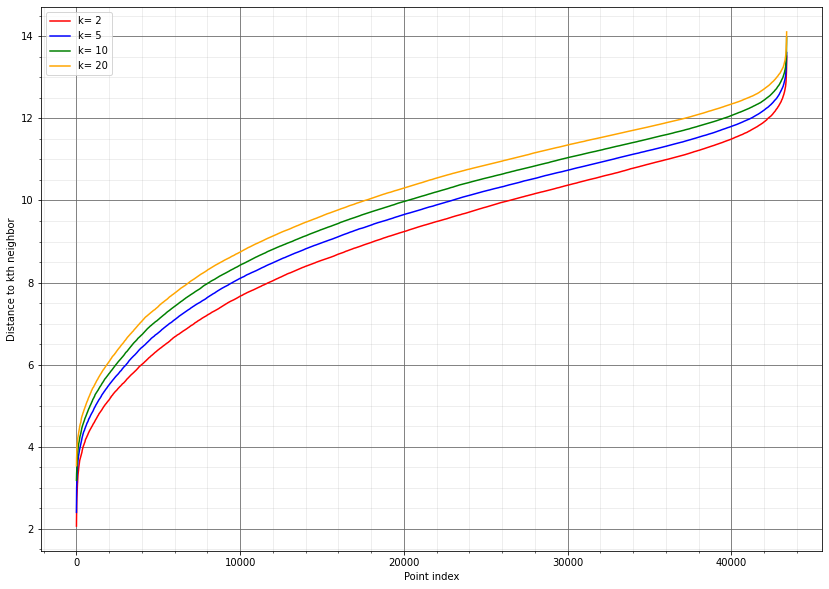

In [ ]:

K_list = [2, 5, 10, 20]
color_list = ['red', 'blue', 'green', 'orange']

pyplot.figure(figsize=(14, 10))
pyplot.xlabel('Point index')
pyplot.ylabel('Distance to kth neighbor')
pyplot.grid(b=True, which='major', color='#666666', linestyle='-')
pyplot.minorticks_on()
pyplot.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

for i in range(0, len(K_list)):
    dists = np.sort(np.transpose(distances[:,(K_list[i]+1)]))
    pyplot.plot(dists, label=('k= ' + str(K_list[i])), color= color_list[i])
    

pyplot.legend()